In [1]:
import pandas as pd
import numpy as nm
import seaborn as sns

In [2]:
df_train= pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Test_set.xlsx')

In [3]:
# df_test.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [4]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [5]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [6]:
df_test.dropna(inplace = True)

In [7]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [8]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [9]:
df_test['Month_of_journey']=pd.to_datetime( df_test['Date_of_Journey'],format="%d/%m/%Y").dt.month
df_test['Day_of_journey']=pd.to_datetime( df_test['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [10]:
df_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [11]:
df_test.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month_of_journey,Day_of_journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6


In [12]:
df_test['Hour_departure']= pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Minute_departure']= pd.to_datetime(df_test['Dep_Time']).dt.minute

In [13]:
df_test.drop(['Dep_Time'],axis=1,inplace=True)

In [14]:
df_test['Hour_arrival']= pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Minute_arrival']= pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [15]:
df_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [16]:
df_test['Duration']

0       10h 55m
1            4h
2       23h 45m
3           13h
4        2h 50m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 2671, dtype: object

In [17]:
hours_arrival= []
minutes_arrival = []
for i in list(df_test['Duration']):
    if 'h' in i:
        hours_arrival.append(int(i.split()[0][:-1]))
        if 'm' in i:
            minutes_arrival.append(int(i.split()[1][:-1]))
        else:
            minutes_arrival.append(0)
    else:
        hours_arrival.append(0)
        if 'm' in i:
            if i.split('m')[0][:-1] == '':
                minutes_arrival.append(0)
            else:
                minutes_arrival.append(int(i.split('m')[0][:-1]))
        else:
            minutes_arrival.append(0)


In [18]:
df_test['Minutes_duration']=minutes_arrival
df_test['Hours_duration'] = hours_arrival

In [19]:
df_test.drop(['Duration'],axis=1,inplace=True)

In [20]:
df_test["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [21]:
df_Airline=pd.get_dummies(df_test['Airline'], drop_first= True)


In [22]:
df_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [23]:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [24]:
Source =df_test['Source']
Destination =df_test['Destination']
df_Source=pd.get_dummies(Source, drop_first= True)
df_Destination = pd.get_dummies(Destination, drop_first= True)
df_Source.columns= ['Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']
df_Destination.columns =['Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi']

In [25]:
df_test['Additional_Info']

0                           No info
1                           No info
2       In-flight meal not included
3                           No info
4                           No info
                   ...             
2666                        No info
2667                        No info
2668                        No info
2669                        No info
2670                        No info
Name: Additional_Info, Length: 2671, dtype: object

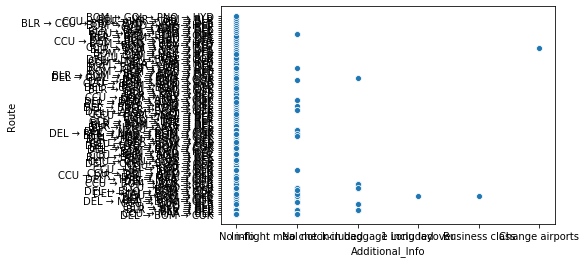

In [26]:
df_test['Additional_Info'].value_counts()
sns.scatterplot(x=df_test['Additional_Info'],y=df_test['Route'])

In [27]:
len(df_test['Route'].unique())


100

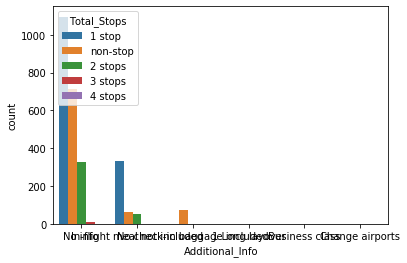

In [28]:
sns.countplot(x=df_test['Additional_Info'],hue=df_test['Total_Stops'])

In [29]:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [30]:
df_test['Additional_Info'].replace('No Info ','No info')

0                           No info
1                           No info
2       In-flight meal not included
3                           No info
4                           No info
                   ...             
2666                        No info
2667                        No info
2668                        No info
2669                        No info
2670                        No info
Name: Additional_Info, Length: 2671, dtype: object

In [31]:
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [32]:
df_test["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [34]:
df_test = pd.concat([df_test, df_Airline, df_Source, df_Destination], axis = 1)

In [35]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Month_of_journey,Day_of_journey,Hour_departure,Minute_departure,Hour_arrival,Minute_arrival,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,5,21,19,15,19,0,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,5,21,8,0,21,0,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,6,24,23,55,2,45,...,0,0,0,0,0,0,1,0,0,0


In [36]:
df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [37]:
df_test.shape

(2671, 28)

In [38]:
df_test.to_excel('test_data.xlsx',index=False)